<a href="https://colab.research.google.com/github/Nadiam75/DeepLearning_HW_1/blob/optimizers/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [98]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.compat.v1 as tf # can be used in both colab and jupyter
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [39]:
lettersDictionary = {0 : 'A' , 1 : 'B', 2: 'C' , 3 : 'D', 4 : 'E',5 : 'F',6 : 'G',7 : 'H',8 : 'I',9 : 'J',10 : 'K' ,11 :'L',12 : 'M',13 : \
                     'N',14 : 'O',15 : 'P',16 :  'Q' , 17 : 'R', 18 : 'S',19 : 'T',20 : 'U',21 : 'V',22 : 'W',23 :'X',24 : 'Y'}

making sure tensorflow 1.X is being used

In [36]:
print(tf.__version__)
#  colab version of changin into tensorflow 1.X
%tensorflow_version 1.x
print(tf.__version__)

1.15.2
1.15.2


# IMPORTING DATA

In [62]:
train_url = 'https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_1/master/DL2122_HW01/DL2122_HW01/Q1_train.csv'
test_url = 'https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_1/master/DL2122_HW01/DL2122_HW01/Q1_test.csv'

train = pd.read_csv(train_url , sep = ',' ) 
test = pd.read_csv(test_url , sep = ',' )


In [65]:
type(train)

pandas.core.frame.DataFrame

#DATA PREPARATION

In [73]:
# normalization 
grayScale = 255
x_train1 = train.drop('label' , axis = 1).astype ('float32')
x_train1 = x_train1.to_numpy()
x_train1 /= grayScale
y_train1 = train['label']
y_train1 = y_train1.to_numpy()
x_test = test.drop('label' , axis = 1).astype('float32')
x_test = x_test.to_numpy()
x_test /= grayScale
y_test = test['label']
y_test = y_test.to_numpy() 
x_train_2d = x_train1.reshape(( 27455, 28,28))
x_test_2d = x_test.reshape((7172,28,28))
x_train, x_validation, y_train, y_validation =\
train_test_split(x_train1, y_train1, test_size=0.25, random_state=1 , shuffle  = True)


In [77]:
depth =25
with tf.Session() as ss :
  y_train_hot=ss.run(tf.one_hot(y_train,depth))
  y_validation_hot=ss.run(tf.one_hot(y_validation,depth))
  y_test_hot=ss.run(tf.one_hot(y_test,depth))


AttributeError: ignored

In [97]:
def layer_FC (x_input, num_of_neurons  , activationFunction , name ,LayerNumber ) :
  inputLength = x_input.get_shape()[1]
  shape = (inputLength , num_of_neurons)
  weights = tf.get_variable(  dtype= tf.float32, shape  = shape  , name \
                            = 'weights' + str (LayerNumber )  , initializer=tf.random_uniform(inputLength , num_of_neurons))
  biases  = tf.get_variable ( dtype = tf.float32 , initializer = tf.random_uniform (num_of_neurons) , name =  'biases' + str (LayerNumber ))
  weightedSum = tf.matmul(x_input , weights ) + biases
  
  if activationFunction is 'relu':
    return tf.nnn.relu(weightedSum)
  elif activationFunction is 'tanh':
    return tf.nn.tanh(weightedSum)
  elif activationFunction is 'sigmoid':
    return tf.nn.sigmoid(weightedSum)
  return weightedSum # otherwise consider the activation function as linear


In [ ]:
x = tf.placeholder(dtype = tf.float32 , shape =  [None , 784] , name = 'x')
y = tf.placeholder(dtype = tf.float32 , shape =  [None , 25] , name = 'y')

In [95]:
lossFucntion = tf.nn.softmax_cross_entropy_with_logits(logits = y_pred , y)
tf.train.AdamOptimizer(learning_rate= = 0.0001)


False

# data visualization

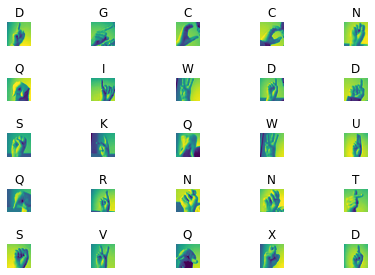

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=5)
fig.tight_layout()
for i in range(25):
  y_actual = y_train1 [i]
  plt.subplot(5,5,i+1).set_title(lettersDictionary[y_actual])
  plt.imshow(x_train_2d[i,:,:])
  plt.axis('off')



# HYPERPARAMETERS

In [ ]:
[height,weight]=x_train.shape[1:]
# num_class=10
# rl=0.001
batchsize=16
# normal_std=0.001

#GRAPH

In [22]:
y_train_hot=tf.Session().run(tf.one_hot(y_train,10))
y_valid_hot=tf.Session().run(tf.one_hot(y_valid,10))
y_test_hot=tf.Session().run(tf.one_hot(y_test,10))
tf.Session().close()
x_train_shaffle=tf.Session().run(tf.random.shuffle(x_train, seed=12321 ))
y_train_shaffle=tf.Session().run(tf.random.shuffle(y_train_hot, seed=12321))

NameError: ignored

## GRAPH

In [13]:
tf.reset_default_graph()
tf.placeholder(dtype = tf.float32 , shape = () , name = 'input')

In [34]:
tf.reset_default_graph()


In [ ]:
y_train_onehot=tf.Session().run(tf.one_hot(y_train,10))
y_valid_onehot=tf.Session().run(tf.one_hot(y_validation,10))
y_test_onehot=tf.Session().run(tf.one_hot(y_test,10))
tf.Session().close() 

<class 'numpy.ndarray'>


In [32]:
tf.Session().close() 

# NEURAL NETWORK SESSION

In [33]:
with tf.InteractiveSession() as sess :
  sess.run(tf.global_variables_initializer())
  for epoch in range(0,10):
      print('==================================================')
      print('====== Epoch=%s =================================== ' %(epoch))
      print('==================================================')
      for i in range(math.floor(num_train/batchsize)):
          f={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
            output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] }
          sess.run(adam,feed_dict=f)
          print('iter {}: \t Loss={:.2f}'.format(i,sess.run(loss,feed_dict=f)))
      f_valid={input_image:x_valid , 
              output_image:y_valid_hot}
      print('--------------------------------------------------')
      print('Epoch:{} \t Validation Loss:{:.2f} '.format(epoch,sess.run(loss,feed_dict=f_valid)))
      print('--------------------------------------------------')



/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


AttributeError: ignored

In [ ]:
len('DGCCNQIWDDSKQWUQRNNTSVQXD')

25

TensorFlow 1.x selected.


1.15.2
